# Análise dos dados
### Prática 4 - Magnetostática e Lei de Faraday

## Tarefa 1: calibração da sonda Hall
Usaremos a aproximação para o campo magnético no centro do solenóide longo
$$ B = \mu_0 n I $$
onde $n$ é a densidade de espiras e $I$ é a corrente.

K = 170.52315331274505 T/V


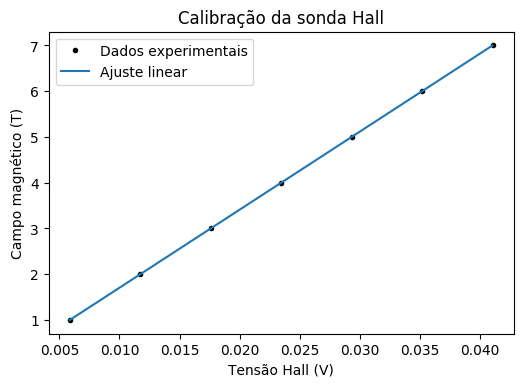

In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

mu_0 = np.pi*4e-7   # valor exato
N = 700 # substituir com dados reais
L = 15e-2 # substituir com dados reais
n = N/L

dados1 = np.loadtxt('dados/calibração.dat').T
Vh, I = dados1
B = mu_0*n*I

ajuste1 = stats.linregress(B,Vh)
slope1,intercept1 = ajuste1[:2] # falta análise de erros

print("K = {} T/V".format(slope1))

plt.figure(dpi=100)
plt.plot(B,Vh,'.k',label="Dados experimentais")
plt.plot(B,slope1*B+intercept1,label='Ajuste linear')
plt.legend(loc='best')
plt.title('Calibração da sonda Hall')
plt.xlabel("Tensão Hall (V)")
plt.ylabel("Campo magnético (T)")
plt.show()

## Tarefa 3: campo magnético de uma bobina circular e de um par de bobinas em configuração anti-Helmholtz

In [ ]:
from scipy import optimize

# Modelos para ajuste
def bobina(z, I, a, z0):
    return mu_0*I*a**2/(2*((z-z0)**2 + a**2)**(3/2))
def antihelmholtz(z, I, a):
    return bobina(z-a/2,I,a,0) - bobina(z+a/2,I,a,0)

# Bobina
dados31 = np.loadtxt('dados/bobina.dat').T
z,B = dados31
a = 15e-2 #substituir com dados reais
I = 0.5   #substituir com dados reais

ajuste31,mcov31 = optimize.curve_fit(bobina,z,B,[I,a,0])
I = ajuste31[0]
a = ajuste31[1]
z0 = ajuste31[2]

plt.figure(dpi=100)
plt.plot(z,B,'.k',label="Dados experimentais")
tz = 1.1*np.linspace(z[0],z[-1],300)
plt.plot(tz,bobina(tz,I,a,z0),label='Ajuste')
plt.legend()
plt.title('Bobina circular')
plt.xlabel("Posição (m)")
plt.ylabel("Campo magnético (T)")
plt.show()

# Par anti-Helmholtz
dados32 = np.loadtxt('dados/antihelmholtz.dat').T
z,B = dados32
a = 15e-2 # substituir com dados reais
I = 0.5   # substituir com dados reais

ajuste32,mcov32 = optimize.curve_fit(antihelmholtz,z,B,[I,a])
I = ajuste32[0]
a = ajuste32[1]

plt.figure(dpi=100)
plt.plot(z,B,'.k',label='Dados experimentais')
tz = 1.1*np.linspace(z[0],z[-1],300)
plt.plot(tz,antihelmholtz(tz,I,a),label='Ajuste')
plt.legend()
plt.title('Par de bobinas anti-Helmholtz')
plt.xlabel("Posição (m)")
plt.ylabel("Campo magnético (T)")

## Tarefa 4: campo magnético no solenoide + lei de Faraday

In [ ]:
R = # resistência ligada ao solenoide
phi = # fase (segundos), valor esperado = 0
B = # amplitude do campo magnético
I = # amplitude de corrente
B0 = mu_0*I*n # valor esperado pro B, aproximação de solenoide longo

## Tarefa 7: indutância mútua de solenoides coaxiais

In [ ]:
N1,a = #solenoide externo
N2,D = #solenoide interno
A = np.pi*D*D/4 # área de seção reta do solenoide interno
n1,n2 = N1/a, N2/a #densidades de espiras

Lteo = mu_0*n1*n2*a*A # indutância mútua obtida teoricamente

eps0 = # tensão de pico no solenoide interno
R = # resistência do resistor ligado ao solenoide externo
V0 = # tensão de pico no resistor ligado ao solenoide externo
f = # frequência (Hz) da corrente alternada

Lmed = eps0*R/(2*np.pi*f*V0) # indutância mútua experimental

print("Indutância pelos parâmetros geométricos:",Lteo)
print("Indutância pelos dados experimentais:",Lmed)